In [136]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

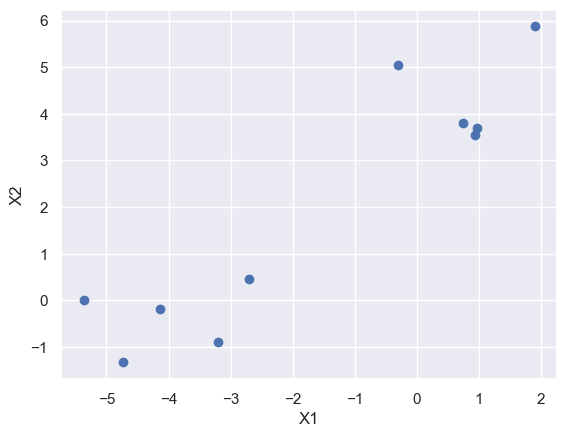

array([[-3.2, -0.9],
       [-0.3,  5. ],
       [ 1. ,  3.7],
       [ 0.7,  3.8],
       [-5.4,  0. ],
       [-2.7,  0.5],
       [ 0.9,  3.5],
       [-4.7, -1.3],
       [ 1.9,  5.9],
       [-4.1, -0.2]])

In [178]:
X, y = make_blobs(n_samples=10, n_features=2, centers=2, random_state=3)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
display(np.round(X, 1))

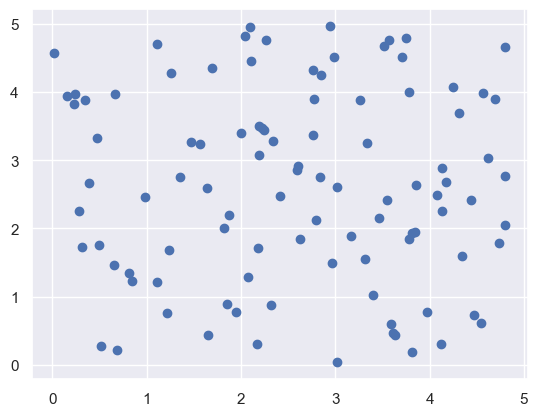

In [148]:
x = np.round(np.random.random(100) * 5, 2)
y = np.round(np.random.random(100) * 5, 2)

plt.scatter(x, y)